In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#split
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
X=scaler.fit_transform(X)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knn=KNeighborsClassifier(n_neighbors=k)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
#pred on test data
y_pred=knn.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score
accuaracy=knn.score(X_test,y_test)
accuaracy

0.6883116883116883

In [35]:
#evaluate the accuracy for diff values of k
accuaracies=[]
k_values=range(1,25)
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  accuaracy=knn.score(X_test,y_test)
  accuaracies.append(accuaracy)

accuaracies

[0.6168831168831169,
 0.6558441558441559,
 0.7012987012987013,
 0.6948051948051948,
 0.6883116883116883,
 0.7012987012987013,
 0.6818181818181818,
 0.6883116883116883,
 0.6818181818181818,
 0.6818181818181818,
 0.7142857142857143,
 0.7207792207792207,
 0.7142857142857143,
 0.7207792207792207,
 0.7207792207792207,
 0.7467532467532467,
 0.7532467532467533,
 0.7662337662337663,
 0.7597402597402597,
 0.7597402597402597,
 0.7597402597402597,
 0.7597402597402597,
 0.7532467532467533,
 0.7467532467532467]

Text(0.5, 1.0, 'K values vs accuaracy')

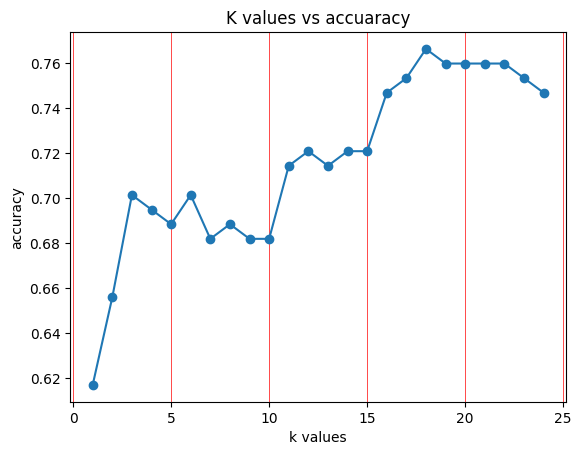

In [51]:
plt.plot(k_values,accuaracies,marker='o')
plt.grid(True,linewidth='0.5', color='red', axis='x')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("K values vs accuaracy")


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[79, 20],
       [28, 27]])

In [56]:
#classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



In [60]:
#new data
x_new=[[1,90,70,30,0,35,0.5,31],
    [6,120,64,32,0,24,0.6,32]]

#scaling
x_new_scaled=scaler.fit_transform(x_new)

In [61]:
#predictions dor new data
y_pred_new=knn.predict(x_new_scaled)

In [62]:
y_pred_new

array([0, 0])